In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio


In [2]:
def create_batchs(ds):
        batchs = []
        ids = ds.stay_id.unique()
        for i in ids:
            batchs.append(ds.loc[ds['stay_id'] == i])
        return batchs

In [3]:


batches_ABP = np.load('preprocessed_batches\ABP_batches.npy', allow_pickle = True)



In [4]:
import plotly.graph_objects as go


fig = go.Figure()
fig.update_layout(xaxis_title='Blood pressure value analysis (N = 371)', yaxis_title = 'Value (mmHg)')
fig.add_trace(go.Box(y=df['ABPm'], boxpoints='all', name = 'ABPm'))
fig.add_trace(go.Box(y=df['ABPs'], boxpoints='all', name = 'ABPs'))
fig.add_trace(go.Box(y=df['ABPd'], boxpoints='all', name = 'ABPd'))
fig.show()

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Comparison between measured and computed ABPm \n (N = 929)')

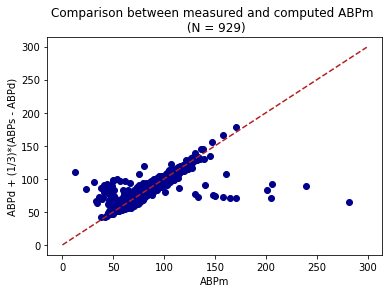

In [ ]:
#See if the mean is computed MAP = DP + 1/3(SP – DP) or MAP = DP + 1/3(PP)

ABPM = df['ABPm']
ABPS = df['ABPs']
ABPD = df['ABPd']
computed_ABPM = ABPD + (1/3)*(ABPS - ABPD)

plt.scatter(ABPM, computed_ABPM, color ='darkblue' )
plt.plot(range(300), range(300), color = 'firebrick', linestyle = '--')
plt.xlabel('ABPm')
plt.ylabel('ABPd + (1/3)*(ABPs - ABPd)')
plt.title('Comparison between measured and computed ABPm \n (N = 929)')


In [11]:
df_hourly = pd.read_csv(r'C:\Users\USER\OneDrive\Summer_project\Azure\data\preprocessed_mimic4_hour_std.csv', delimiter=',')
df_demographics = pd.read_csv(r"C:\Users\USER\OneDrive\Summer_project\Azure\data\demographics_mimic4.csv", delimiter=',')

df_std = df_hourly.pivot_table(index = ['stay_id', 'hour_from_intime'], columns = 'feature_name', values = 'std')
df_std = df_std.reset_index(level=[ 'stay_id'])
batch = create_batchs(df_std)
# df_std.drop(columns = 'stay_id', inplace = True)
vit = ['ABPd', 'ABPs', 'ABPm']
mean_std = pd.DataFrame()
for v in vit:
    mean_std[v] = [df_std.loc[i][v].mean() for i in range(25)]

plt.plot(range(1,26), mean_std['ABPd'], label = 'ABPd', linestyle='-', marker='o')
plt.plot(range(1,26), mean_std['ABPs'], label = 'ABPs', linestyle='-', marker='o')
plt.plot(range(1,26), mean_std['ABPm'], label = 'ABPm', linestyle='-', marker='o')
plt.ylabel('Standard deviation (mmHg)')
plt.xlabel('Hours')
plt.title('Standard deviations for hourly aggregation in TBI patients (N = 929)')
plt.legend(loc='upper right')
plt.savefig('std_analysis')
plt.show()

KeyError: 'std'

(0.0, 10.0)

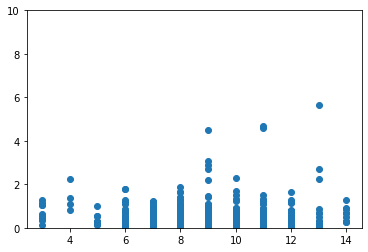

In [ ]:
#Variance par heure en fonction de sévérité sur les 6 premières heures
severity = df_demographics['gcs'].values

abpd=[]
for i in range(len(batch)):
    batch[i].reindex(range(1, 7), fill_value = None) 
    abpd.append((batch[i]['ABPd'].mean()))

plt.scatter(severity, abpd)
plt.ylim((0,10))

feature_name       stay_id  ABPd  ABPm  ABPs        HR  ICP   RR      SpO2
hour_from_intime                                                          
3                 30006565   NaN   NaN   NaN  0.505291  NaN  0.0  2.373563
4                 30006565   NaN   NaN   NaN  0.000000  NaN  0.0  0.000000
5                 30006565   NaN   NaN   NaN  0.000000  NaN  0.0  0.000000
6                 30006565   NaN   NaN   NaN  0.000000  NaN  0.0  0.000000
7                 30006565   NaN   NaN   NaN  0.000000  NaN  0.0  0.000000
...                    ...   ...   ...   ...       ...  ...  ...       ...
155               39985110   NaN   NaN   NaN  0.000000  NaN  0.0       NaN
156               39985110   NaN   NaN   NaN  0.000000  NaN  0.0  0.000000
157               39985110   NaN   NaN   NaN  0.000000  NaN  0.0  0.000000
158               39985110   NaN   NaN   NaN  0.000000  NaN  0.0  0.000000
159               39985110   NaN   NaN   NaN  0.000000  NaN  0.0  0.000000

[117206 rows x 8 columns

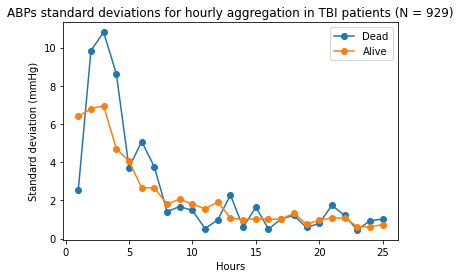

In [6]:
#Variance par heure en fonction de s'ils décèdent à 48h ou non 
dead = df_demographics.loc[df_demographics['death'] == 1].stay_id
alive = df_demographics.loc[df_demographics['death'] == 0].stay_id


std_dead = df_std[df_std.stay_id.isin(dead)]

std_alive = df_std[df_std.stay_id.isin(alive)]

# std_dead = std_dead.fillna(0)
# std_alive = std_alive.fillna(0)

print(std_alive)
mean_std_dead = pd.DataFrame()
mean_std_alive = pd.DataFrame()
vit = ['ABPd', 'ABPs', 'ABPm']
for v in vit:
    mean_std_dead[v] = [std_dead.loc[i][v].mean() for i in range(25)]
    mean_std_alive[v] = [std_alive.loc[i][v].mean() for i in range(25)]


plt.plot(range(1,26), mean_std_dead['ABPs'], label = 'Dead', linestyle='-', marker='o')
plt.plot(range(1,26), mean_std_alive['ABPs'], label = 'Alive', linestyle='-', marker='o')
plt.ylabel('Standard deviation (mmHg)')
plt.xlabel('Hours')
plt.title('ABPs standard deviations for hourly aggregation in TBI patients (N = 929)')
plt.legend(loc='upper right')
plt.savefig('std_analysis')
plt.show()


In [19]:
#Valeurs 6 premières heures vs valeurs le reste
list_vit = ['ABPd', 'ABPs', 'ABPm']
print(df_hourly)
# df_hourly = df_hourly.pivot_table(index = ['stay_id', 'hour_from_intime'], columns = 'feature_name', values = 'feature_mean_value')

df_hourly=df_hourly.reset_index(level='stay_id')
batches = create_batchs(df_hourly)

batch_6 = []
batch_24 = []

for i in range(len(batches)):
    batch_6.append(batches[i].reindex(range(1,7)))
    batch_24.append(batches[i].reindex(range(1,25)))

df_6 = pd.concat(batch_6)
df_24 = pd.concat(batch_24)

print(df_6)
fig = go.Figure()
fig.update_layout(xaxis_title='Vitals values analysis (N = 929)', yaxis_title = "Value")
for i in range(len(list_vit)):
    fig.add_trace(go.Box(y=df_6[list_vit[i]], boxpoints='all', name = list_vit[i]))
    fig.add_trace(go.Box(y=df_24[list_vit[i]], boxpoints='all', name = list_vit[i]))


fig.show()

feature_name               ABPd  ABPm  ABPs     HR  ICP    RR        SpO2
stay_id  hour_from_intime                                                
30006565 3                  NaN   NaN   NaN  100.5  NaN  21.0   95.666667
         4                  NaN   NaN   NaN   99.0  NaN  20.0   95.000000
         5                  NaN   NaN   NaN   81.0  NaN  22.0  100.000000
         6                  NaN   NaN   NaN   80.0  NaN  18.0   98.000000
         7                  NaN   NaN   NaN   80.0  NaN  19.0   97.000000
...                         ...   ...   ...    ...  ...   ...         ...
39985110 155                NaN   NaN   NaN   82.0  NaN  19.0         NaN
         156                NaN   NaN   NaN   82.0  NaN  30.0  100.000000
         157                NaN   NaN   NaN   80.0  NaN  28.0   99.000000
         158                NaN   NaN   NaN   84.0  NaN  27.0  100.000000
         159                NaN   NaN   NaN   80.0  NaN  17.0  100.000000

[132332 rows x 7 columns]
feature_nam

(1000, 13, 24)


Text(0, 0.5, 'Value (mmHg)')

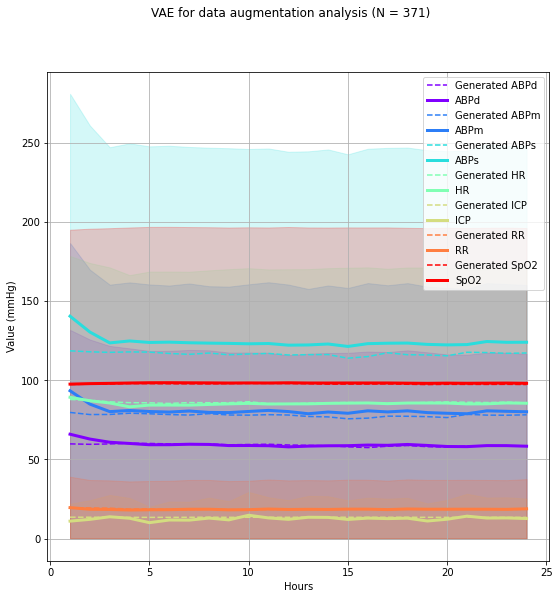

In [ ]:
#VAE data augmentation
from pyrsistent import b


list_vit = ['ABPd', 'ABPm', 'ABPs', 'HR', 'ICP', 'RR', 'SpO2']
list_vit_clean = ['ABPd', 'ABPm', 'ABPs', 'HR', 'ICP', 'RR','SpO2']


nb_hours = 24

df = pd.read_csv('preprocessed_batches/df_hourly_reg.csv')
new_samples = np.load('preprocessed_batches/new_samples_vae.npy')
TBI_data = np.load('preprocessed_batches/final_data_TBI.npy')


agg_mean = (df).groupby(df.hour_from_intime).agg({'RR': np.mean, 'ABPm': np.mean, 'ABPs': np.mean, 'ABPd': np.mean,  'ICP':np.mean, 'SpO2':np.mean, 'HR':np.mean})
agg_std = (df).groupby(df.hour_from_intime).agg({'RR': np.mean, 'ABPm': np.mean, 'ABPs': np.mean, 'ABPd': np.mean, 'ICP':np.mean, 'SpO2':np.mean, 'HR':np.mean})
color = iter(cm.rainbow(np.linspace(0, 1, len(list_vit))))
color_2 = iter(cm.rainbow(np.linspace(0, 1, len(list_vit_clean_2))))
print(new_samples.shape)
new_samples = new_samples.mean(axis = 0)


fig, ax = plt.subplots(figsize=(9, 9))
fig.suptitle('VAE for data augmentation analysis (N = 371)')
for i in (range(len(list_vit))):
    c = next(color)
    
    ax.plot(range(1,nb_hours + 1),new_samples[i], label = 'Generated %s' %list_vit_clean[i], color=c, ls='--' )
    ax.plot(range(1,nb_hours + 1), agg_mean[list_vit[i]], alpha=1, color=c, label=list_vit_clean[i], linewidth = 3.0)
    ax.fill_between(range(1,nb_hours + 1), agg_mean[list_vit[i]] - agg_std[list_vit[i]], agg_mean[list_vit[i]] + agg_std[list_vit[i]], color=c  , alpha=0.2)
    plt.grid()

ax.legend(loc='best')
ax.set_xlabel("Hours")
ax.set_ylabel("Value (mmHg)")


In [ ]:
print(batches_ABP)

[]
